In [280]:
import pandas

data = pandas.read_csv('data/five.csv').drop(columns='date')
numbers = data[['num.1','num.2','num.3','num.4','num.5']]
# data = data[data.year > 1997]

In [281]:
# it would be nice to continue the scatter pattern somehow

# plan1: make a GAN
#   input: year + week
#   output: 90 long vector each item between 0 and 1 with a sum of 5 hopefully
# and see what happens
# training + test data: parse winning numbers into this 90 long vector

# plan2: make a GAN to generate a pattern
#   input: ?? lottery numbers (previous week?) aka. latent_dimension = 90
#       noise: 5 random -> create sparse binary vector with arrangement like (15,30,45,60,75) +- (weight * noise[0:5])
#   output: some kind of pattern eg N vector each 90 long with 0s and (hopefully 5) 1s 

In [282]:
# create a custom dataset
import numpy
from torch.utils.data import Dataset

class LotteryNumbers(Dataset):
    def __init__(self, df, slice_len):
        self.df = df
        self.len = slice_len

    def __len__(self):
        return len(self.df)-self.len

    def __getitem__(self, idx):
        nums = self.df.iloc[idx:idx+self.len] - 1
        result = torch.zeros(self.len, 90)
        for row in nums.iterrows():
            result[row[0]-idx][row[1]] = 1
        return (idx,result)

def parseTensor(t):
    return list(numpy.where(t == 1)[0] + 1)


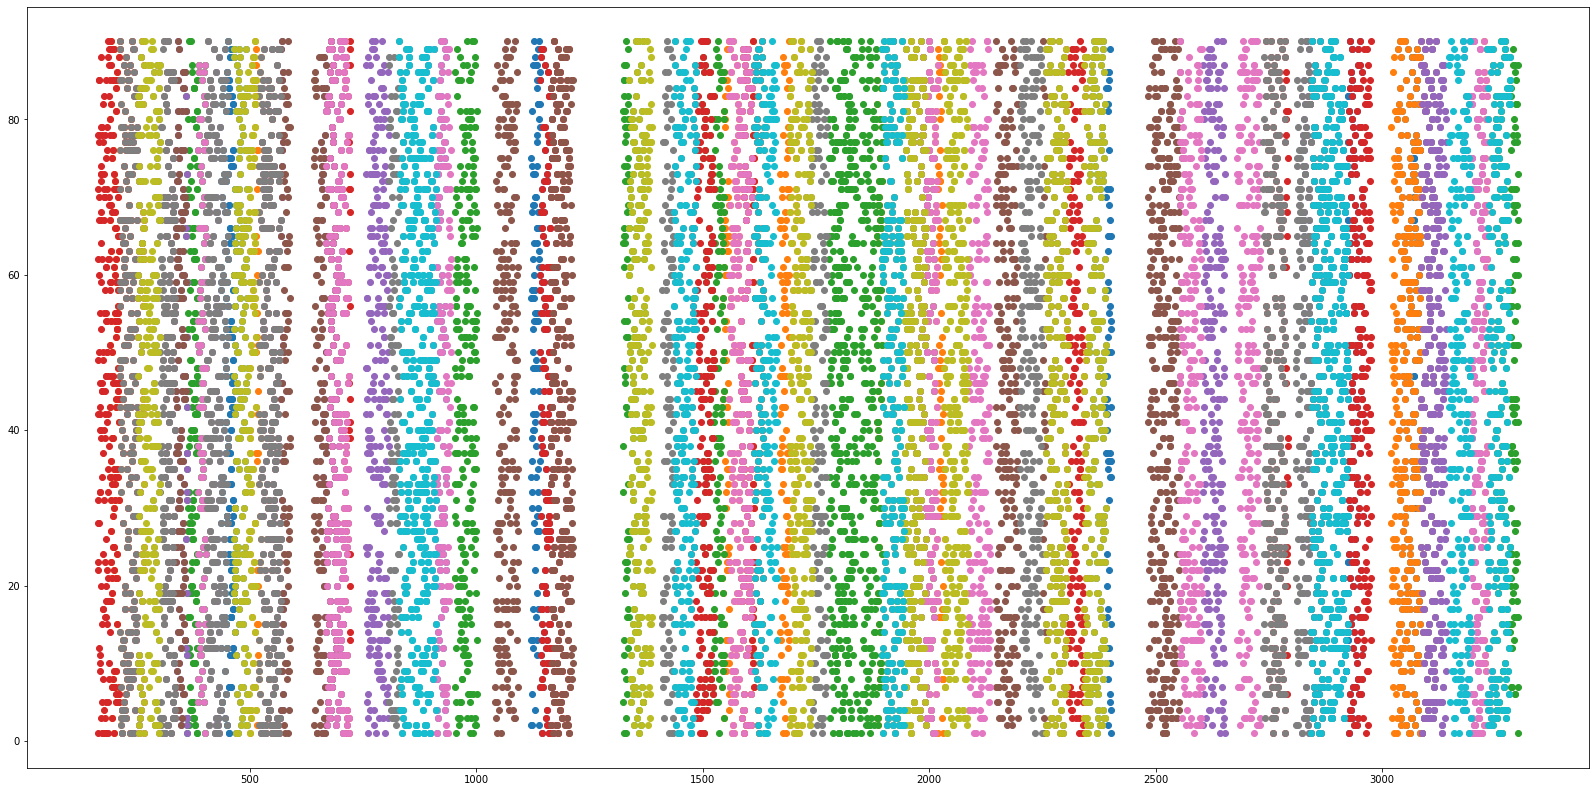

In [283]:
import torch
from torch.utils.data import DataLoader

batch_size = 10
workers = 2

data_slice_lenght = 50

indexes = []
dataset = LotteryNumbers(numbers, data_slice_lenght)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=1)
device = torch.device('cpu')

for i in range(10):
    test_batch_idxs, test_batch = next(iter(dataloader))

    from matplotlib import pyplot
    xx,yy = ([],[])
    for idx, batch in zip(test_batch_idxs, test_batch):
        batch = [(int(idx)+subidx, parseTensor(mx)) for subidx, mx in zip(range(len(batch)), batch)]
        batch = [(id,n) for id, ns in batch for n in ns]
        xxx,yyy = zip(*batch)
        xx.append(xxx)
        yy.append(yyy)

    pyplot.rcParams['figure.figsize'] = (28,14)
    pyplot.scatter(xx,yy)